# Predicting Life Satisfaction in the Country based on its GDP Per Capita

GPD Data - [https://www.imf.org/external/pubs/ft/weo/2017/02/weodata/index.aspx](https://www.imf.org/external/pubs/ft/weo/2017/02/weodata/index.aspx)

Life Satisfaction Data - [https://stats.oecd.org/index.aspx?DataSetCode=BLI](https://stats.oecd.org/index.aspx?DataSetCode=BLI)

Example from the book Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron

Notebook on the [Google Colab](https://colab.research.google.com/drive/1yl7pDuK2UMkMaN5zoJRg9EDXZXHkgWJz).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
datapath = '../datasets/'

In [3]:
oecd_bli = pd.read_csv(datapath + "oecd_2017.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "weo_data_2017.xls",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [4]:
oecd_bli[:5]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


In [5]:
oecd_bli[oecd_bli.Indicator == 'Life satisfaction'][:5]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2859,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2860,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
2861,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2862,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2863,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.6,NaN,NaN


In [6]:
gdp_per_capita[:5]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2017,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",572.163,2013
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4520.268,2011
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4225.004,2016
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4401.432,2015
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",16826.192,2011


In [7]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
Country                          189 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    189 non-null object
2017                             189 non-null float64
Estimates Start After            189 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 10.4+ KB


## Data Preparation

In [8]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2017": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

In [9]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [10]:
country_stats

,GDP per capita,Life satisfaction
Country,,
South Africa,6089.224,4.8
Mexico,9249.265,6.6
Brazil,10019.790,6.6
Russia,10248.238,6.0
Turkey,10434.023,5.5
Poland,13429.414,6.0
Hungary,13459.733,5.3
Chile,14314.752,6.7
Latvia,15402.657,5.9


In [11]:
country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, South Africa to Luxembourg
Data columns (total 2 columns):
GDP per capita       38 non-null float64
Life satisfaction    38 non-null float64
dtypes: float64(2)
memory usage: 912.0+ bytes


## Data Visualization

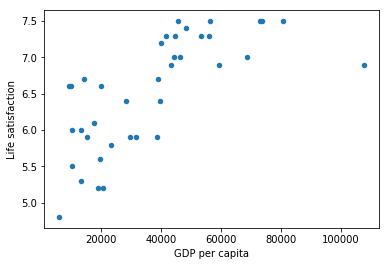

In [12]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

In [13]:
country_stats[country_stats["GDP per capita"] > 100000]

,GDP per capita,Life satisfaction
Country,,
Luxembourg,107708.217,6.9


## Linear Regrssion

In [14]:
import sklearn.linear_model

In [27]:
# Prepare Data
gdp = country_stats["GDP per capita"].values.reshape(-1, 1)
life_sat = country_stats["Life satisfaction"].values.reshape(-1, 1)

In [28]:
gdp[:5]

array([[ 6089.224],
       [ 9249.265],
       [10019.79 ],
       [10248.238],
       [10434.023]])

In [29]:
life_sat[:5]

array([[4.8],
       [6.6],
       [6.6],
       [6. ],
       [5.5]])

### Create and train the model

In [30]:
# Create a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(gdp, life_sat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predict life satisfaction for Hong Kong (GDP = 44999)


In [31]:
model.predict([[44999]])

array([[6.71210214]])

### Model Visualization

In [32]:
t0, t1 = model.intercept_[0], model.coef_[0][0]

In [33]:
t0, t1

(5.660020640588442, 2.338010836985739e-05)

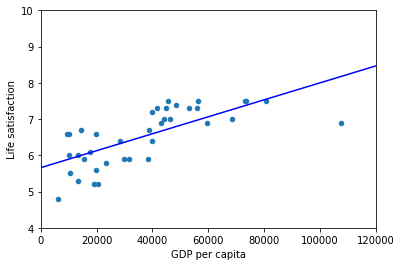

In [34]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 120000, 4, 10])
X=np.linspace(0, 120000, 1000)
plt.plot(X, t0 + t1*X, "b")

## k-Nearest Neighbors 

In [35]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

### Train the Regressor

In [36]:
knn.fit(gdp, life_sat)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

### Predict life satisfaction for Hong Kong (GDP = 44999)

In [37]:
knn.predict([[44999]])

array([[7.26666667]])